# Linear regression models
Linear regression is a linear approach to modeling the relationship between a dependent variable and one or more independent variables.

## Summary

In this exercise we will explore regression models using stock prices to predict future outcomes. 

We will use Numpy which is a matrix manipulation library. Pandas which is a datastructure library. Matplotlin with is a plotting tool. Sklearn which will handle the regressions. Also, yfinance to retreive the data and the standard datetime library.

Using:
1. Linear regression
2. Ridge regression
3. Lazo regression
4. KNN regression

## Code

In [169]:
# main modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

#Required to manipulate df
from pandas_datareader import data as pdr
#updated yahoo finance fetcher
import yfinance as yf
import datetime

#ML 
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor

In [170]:
# Initial parameters
stock = 'IBM'
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2019, 9, 6)

#pull data using yfinance into a dataframe
yf.Ticker(stock)
df = pdr.get_data_yahoo(stock, start=start, end=end).reset_index()
df.head(3)


,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-02,154.809998,153.539993,154.500000,154.250000,4202500.0,142.483978
1,2018-01-03,159.809998,156.330002,157.339996,158.490005,9441600.0,146.400558
2,2018-01-04,162.320007,159.369995,159.649994,161.699997,7556200.0,149.365707


In [171]:
df.tail(3)

,Date,High,Low,Open,Close,Volume,Adj Close
420,2019-09-04,136.429993,135.149994,135.710007,136.320007,2247900.0,136.320007
421,2019-09-05,141.699997,138.050003,138.300003,140.970001,5011600.0,140.970001
422,2019-09-06,141.529999,140.460007,141.520004,140.570007,2576800.0,140.570007


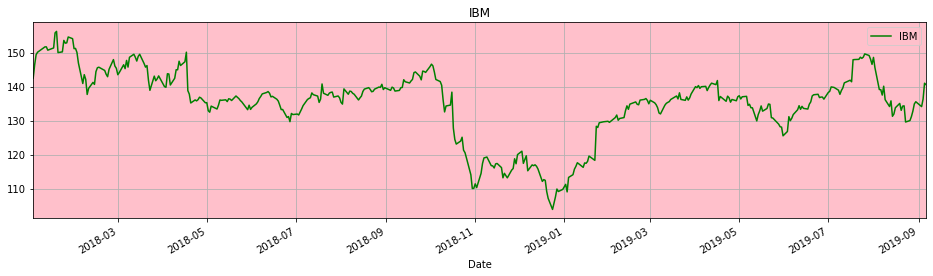

In [172]:
#Pink Background. Fight me.
plt.rcParams['axes.facecolor']='pink'
plt.rcParams['savefig.facecolor']='pink'

#Set Date column as index
df.set_index('Date', inplace=True)
df_Tot = df[df.columns[-1]]
df_Tot.plot(label=stock, figsize=(16,4), title=stock, grid=True, legend=True, color= 'green')

A smooth line is easier to visualize. 

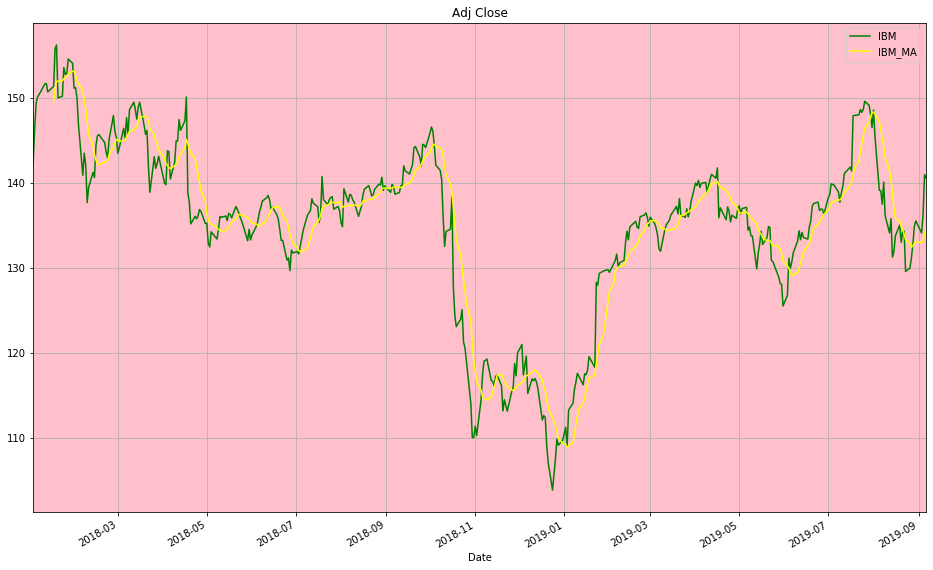

In [176]:
# plot moving average
df_MA = df[df.columns[-1]].rolling(10).mean()
df_raw.plot(label=stock, figsize=(16,8), title=df_full.columns[-1], grid=True, legend=True, color='green')
df_MA.plot(label=stock+'_MA', figsize=(16,10), title=df_full.columns[-1], grid=True, legend=True, color='yellow')

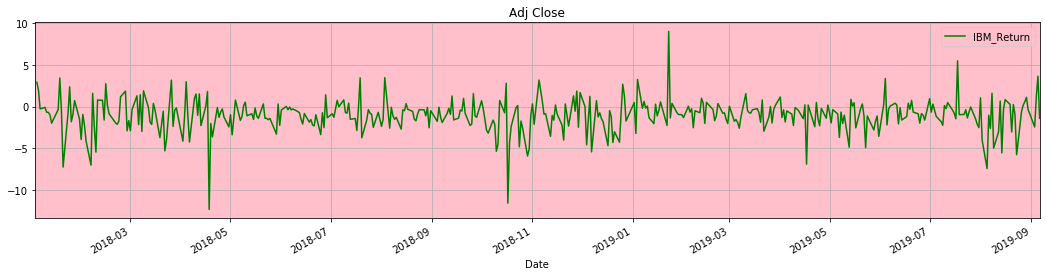

In [177]:
# plot return deviation
df_ret = df[df.columns[-1]] - df[df.columns[-1]].shift(1) - 1
df_ret.plot(label=stock+'_Return', figsize=(18,4), title=df_full.columns[-1], grid=True, legend=True, color='green')


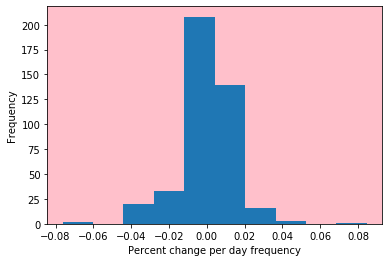

In [161]:
df['Adj Close'].pct_change().plot.hist(100)
plt.xlabel('Percent change per day frequency')
plt.show()

## Modeling

We use scikit-learn packages to train our regression models. We will do the following:

1. Linear regression
2. Ridge regression
3. Lasso
4. KNN regression


### Date pre-process: Train/Test split

The independent variables are: high, low, open, close, volume. The dependent variable is adj close price

We have to split dataset into 2 parts: traing and testing. The first 80 % we use as traing set and the remaining 20% is the testing set. 

In [162]:
# train/test split

X = df.iloc[:,:-1].to_numpy() 
y = df.iloc[:,-1].to_numpy() 

num_data = df_full.shape[0]
split_ratio = 0.8
split = int(split_ratio * num_data)

X_train = X[:split]
y_train = y[:split].reshape(-1,1)
X_test = X[split:]
y_test = y[split:].reshape(-1,1)


split_time = df_full.index[split]

## Linear regression

Training RMSE is: 1.698313
Testing RMSE is: 5.087844


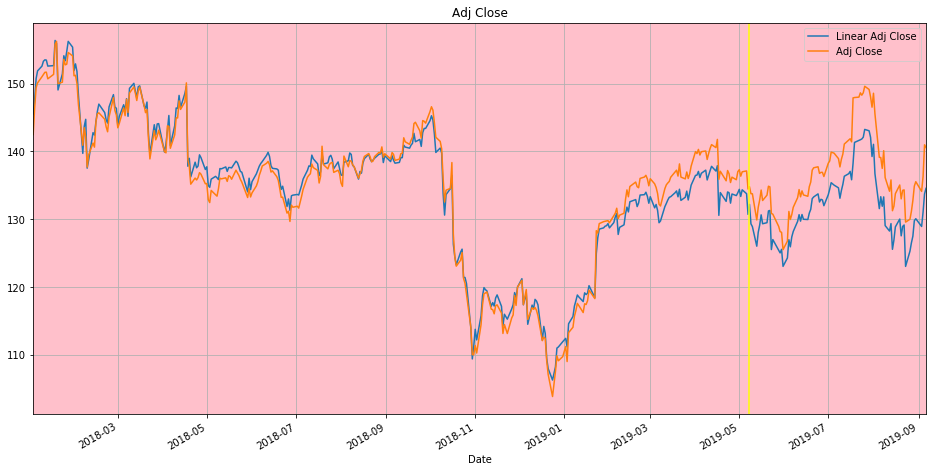

In [163]:
# build Linear regression model
# training
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)

# testing
trainings = reg_linear.predict(X_train).reshape(-1,1)
predictions = reg_linear.predict(X_test).reshape(-1,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_linear = pd.DataFrame(all_pred, columns=['Linear '+df_full.columns[-1]], index=df_full.index)
df_linear[df_full.columns[-1]] = y

# plot results and add train/test split timing line
df_linear.plot(label=stock+'_Linear', figsize=(16,8), title=df_full.columns[-1], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='yellow')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse = pd.DataFrame([train_rmse, test_rmse], columns=['Linear'], index=['training', 'testing'])

## Ridge regression

Training RMSE is: 1.698314
Testing RMSE is: 5.087284


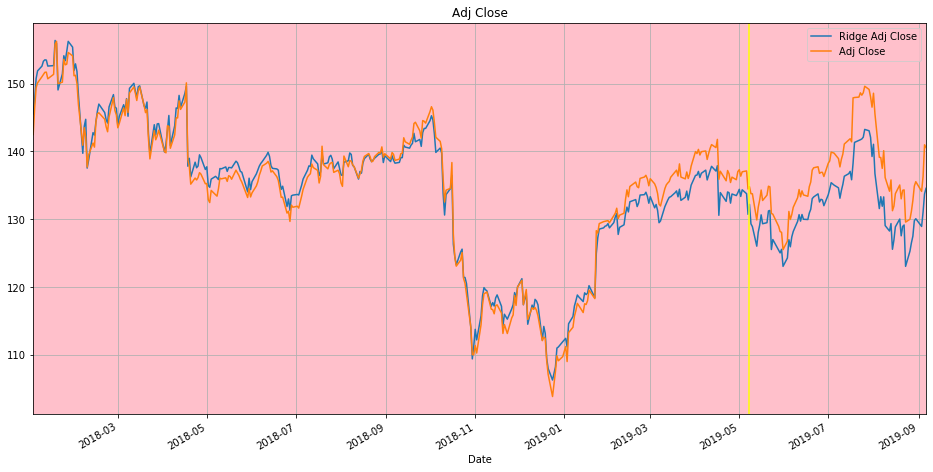

In [164]:
# build Ridge regression model
# training
reg_ridge = Ridge(alpha=.5)
reg_ridge.fit(X_train, y_train)

# testing
trainings = reg_ridge.predict(X_train).reshape(-1,1)
predictions = reg_ridge.predict(X_test).reshape(-1,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_ridge = pd.DataFrame(all_pred, columns=['Ridge '+df_full.columns[-1]], index=df_full.index)
df_ridge[df_full.columns[-1]] = y

# plot results and add train/test split timing line
df_ridge.plot(label=stock+'_Ridge', figsize=(16,8), title=df_full.columns[-1], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='yellow')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['Ridge'] = [train_rmse, test_rmse]


## Lasso regression

/home/jpp/ML/env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.74979244791166, tolerance: 3.9227346364706355
  positive)


Training RMSE is: 1.712410
Testing RMSE is: 5.022411


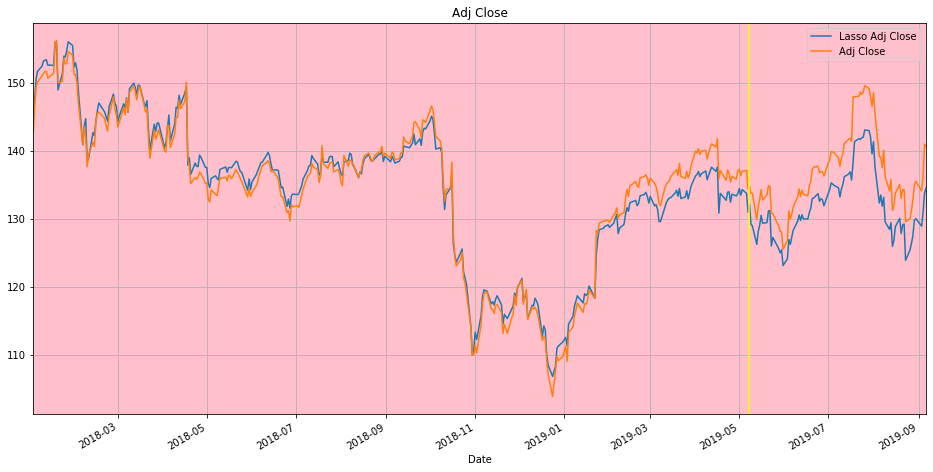

In [178]:
# build Lasso regression model
# training
reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(X_train, y_train)

# testing
trainings = reg_lasso.predict(X_train).reshape(-1,1)
predictions = reg_lasso.predict(X_test).reshape(-1,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_lasso = pd.DataFrame(all_pred, columns=['Lasso '+df_full.columns[-1]], index=df_full.index)
df_lasso[df_full.columns[-1]] = y

# plot results and add train/test split timing line
df_lasso.plot(label=stock+'_Lasso', figsize=(16,8), title=df_full.columns[-1], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='yellow')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['Lasso'] = [train_rmse, test_rmse]



## KNN regression

Training RMSE is: 9.307301
Testing RMSE is: 8.042204


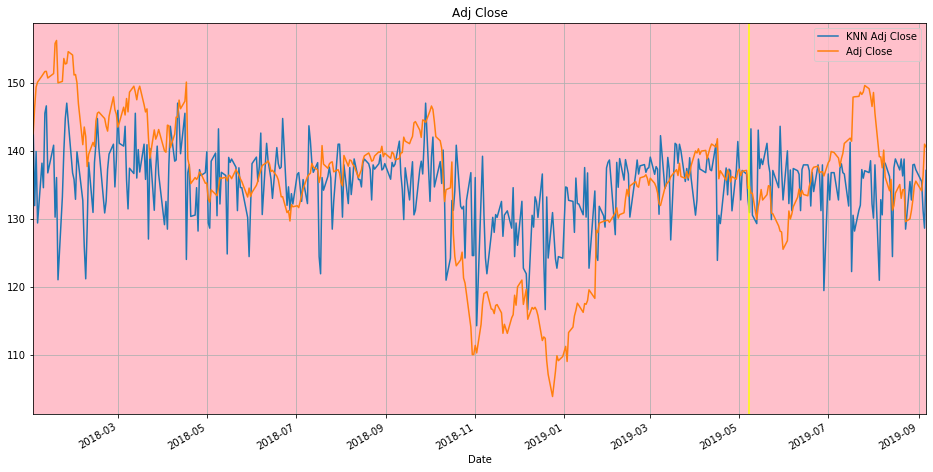

In [180]:
# build KNN regression model
# training
reg_knn = KNeighborsRegressor(n_neighbors=4)
reg_knn.fit(X_train, y_train)

# testing
trainings = reg_knn.predict(X_train).reshape(-1,1)
predictions = reg_knn.predict(X_test).reshape(-1,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_knn = pd.DataFrame(all_pred, columns=['KNN '+df_full.columns[-1]], index=df_full.index)
df_knn[df_full.columns[-1]] = y

# plot results and add train/test split timing line
df_knn.plot(label=stock+'_KNN', figsize=(16,8), title=df_full.columns[-1], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='yellow')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['KNN'] = [train_rmse, test_rmse]

## Vizualization

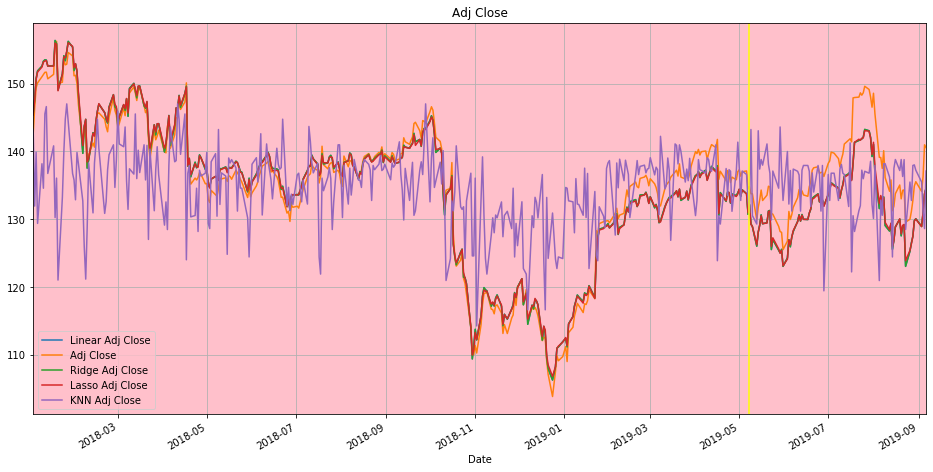

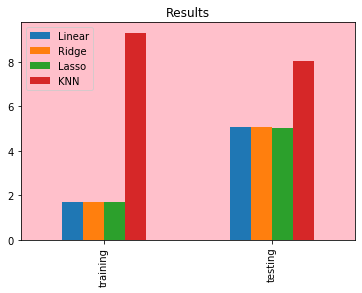

In [182]:
#Mix all models in one plot
df_all = df_linear
df_all[df_ridge.columns[0]] = df_ridge[df_ridge.columns[0]]
df_all[df_lasso.columns[0]] = df_lasso[df_lasso.columns[0]]
df_all[df_knn.columns[0]] = df_knn[df_knn.columns[0]]

# plot results and add train/test split timing line
df_all.plot(label=stock, figsize=(16,8), title=df_all.columns[1], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='yellow')

df_rmse.plot(kind='bar', title='Results')

There is very dinstiction between linear, ridge and lasso with the latter having a slight advantage.